In [1]:
from saliencyserieslab.classifier import SktimeClassifier
from saliencyserieslab.load_data import UcrDataset

dataset = "SwedishLeaf"
modelname = "resnet"

model = SktimeClassifier()
model.load_pretrained_model("./models/{}_{}_1".format(modelname, dataset))

ucr = UcrDataset(
        name=dataset,
        float_dtype=16,
        scale=False,
    )

test_x, test_y = ucr.load_split("test")

2024-11-15 16:36:33.097666: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-15 16:36:33.098567: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 16:36:33.100624: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 16:36:33.106444: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-15 16:36:33.116801: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [ ]:
from saliencyserieslab.explainers.leftist_explainer import LeftistExplainer

explainer = LeftistExplainer(
    model=model,
    nb_interpretable_feature=test_x.shape[1] // 4,
    learning_process="SHAP",
    background=test_x,
)

w = explainer.explain_instance(test_x[0], test_y[0])

w.shape

In [ ]:
from saliencyserieslab.classifier import SktimeClassifier
from saliencyserieslab.load_data import UcrDataset

dataset = "SwedishLeaf"
modelname = "mrseql"

model = SktimeClassifier()
model.load_pretrained_model("./models/{}_{}_1".format(modelname, dataset))

ucr = UcrDataset(
        name=dataset,
        float_dtype=16,
        scale=False,
    )

test_x, test_y = ucr.load_split("test")

sample_x, sample_y = test_x[0], test_y[0]

In [17]:
from saliencyserieslab.load_data import UcrDataset
from mrseql import MrSEQLClassifier

ucr = UcrDataset(
        name="ECG200",
        float_dtype=32,
        scale=False,
    )

train_x, train_y = ucr.load_split("train")

model = MrSEQLClassifier()
model.fit(train_x, train_y)

/home/eirik/anaconda3/envs/ssl/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


MrSEQLClassifier()

In [16]:
from saliencyserieslab.load_data import UcrDataset
from mrseql import MrSEQLClassifier

ucr = UcrDataset(
        name="ECG200",
        float_dtype=16,
        scale=False,
    )

test_x, test_y = ucr.load_split("test")

print("accuracy : {}".format(model.score(test_x, test_y)))

NameError: name 'model' is not defined

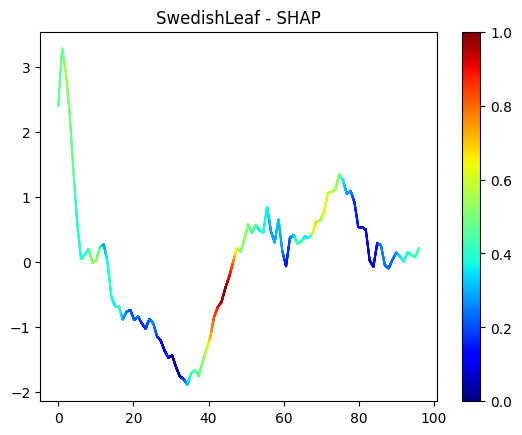

In [3]:
from saliencyserieslab.plotting import plot_weighted

sample_x, sample_y = test_x[99], test_y[99]

w = model.map_sax_model(sample_x)[sample_y]

import numpy as np

w = np.interp(w, (w.min(), w.max()), (0, 1))

plot_weighted(ts=sample_x, w=w, modelname="MrSEQLClassifier", explainername="SHAP", dataset="SwedishLeaf", show=True, colormap="jet")

In [14]:
from saliencyserieslab.load_data import UcrDataset
from saliencyserieslab.plotting import plot_graph, plot_weighted

import pickle

dataset = "Plane"

ucr = UcrDataset(
        name=dataset,
        float_dtype=32,
        scale=False,
    )

test_x, test_y = ucr.load_split("test")
train_x, train_y = ucr.load_split("train")

print("train shape : {}".format(train_x.shape))
print("test shape : {}".format(test_x.shape))

data = [train_x, train_y, test_x, test_y]


with open("./data/{}.pkl".format(dataset), "wb") as f:
    pickle.dump(data, f)

train shape : (105, 144)
test shape : (105, 144)


In [3]:
model.predict(test_x[0].reshape(1,-1))

array([9])

In [4]:
from saliencyserieslab.load_data import UcrDataset
from mrseql import MrSEQLClassifier

ucr = UcrDataset(
        name="ECG200",
        float_dtype=32,
        scale=False,
    )

train_x, train_y = ucr.load_split("train")

model = MrSEQLClassifier()
model.fit(train_x, train_y)

/home/eirik/anaconda3/envs/ssl/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


MrSEQLClassifier()

In [5]:
import pickle

# pickle the model
with open('./models/mrseql_ECG200_1.pkl', 'wb') as f:
    pickle.dump(model, f)

In [1]:
from saliencyserieslab.load_data import UcrDataset
import pickle

with open('./models/mrseql_ECG200_1.pkl', 'rb') as f:
    model = pickle.load(f)

ucr = UcrDataset(
        name="ECG200",
        float_dtype=32,
        scale=False,
    )

train_x, train_y = ucr.load_split("test")

model.predict(train_x[0].reshape(1,-1))

array([1])